In [1]:
using Revise
using Pkg
Pkg.activate(".")
using GatekeeperFormationFlight

  Activating project at `~/Documents/repos/GatekeeperFormationFlight.jl/examples`
┌ Warning: Replacing docs for `GatekeeperFormationFlight.is_colliding :: Union{}` in module `GatekeeperFormationFlight`
└ @ Base.Docs docs/Docs.jl:243
┌ Warning: Replacing docs for `GatekeeperFormationFlight.collision_distance :: Union{}` in module `GatekeeperFormationFlight`
└ @ Base.Docs docs/Docs.jl:243


In [2]:
using StaticArrays, LinearAlgebra
using Dubins3D
using BenchmarkTools

In [26]:
qi = [0.0, 0.0, 0.0, 0.0, 0.0]
qf = [10.0, 1.0, 1.0, 0.0, 0.0]
turning_radius = 1.0
pitch_limits = [-pi/4, pi/4]

@time maneuver = DubinsManeuver3D(qi, qf, turning_radius, pitch_limits)
@time samples = compute_sampling(maneuver)

  0.000062 seconds (1.25 k allocations: 72.375 KiB)
  0.000304 seconds (18.01 k allocations: 756.469 KiB)


1000-element Vector{Any}:
 [0.0, 0.0, 0.0, 0.0, 0.0]
 [0.01011038689646604, 3.6201899939426055e-5, 3.607993736263772e-5, 0.0071612977019725275, 0.007137110813137656]
 [0.02021974033636971, 0.0001447983672661947, 0.00014431791160598968, 0.014322230620799278, 0.014274221626275311]
 [0.03032702718004336, 0.00032576170799536143, 0.0003247084092893225, 0.021482433991915854, 0.021411332439412966]
 [0.04043121492143627, 0.000579045777113224, 0.0005772422416572549, 0.02864154308791965, 0.028548443252550623]
 [0.05053127200449203, 0.0009045859960127035, 0.0009019065451076546, 0.035799193237148405, 0.03568555406568828]
 [0.06062616813900891, 0.00130229937688595, 0.001298684781846536, 0.04295501984225586, 0.04282266487882593]
 [0.07071487461581172, 0.0017720845540605352, 0.0017675567407304316, 0.05010865839878372, 0.04995977569196359]
 [0.08079636462106358, 0.002313821822259797, 0.002308498538296709, 0.057259744513728804, 0.057096886505101245]
 [0.09086961354954744, 0.0029273731817611574, 0.00292

In [19]:
using Dubins

qi = [0.0, 0.0, 0.0]
qf = [10.0, 1.0]
turning_radius = 1.0


1.0

In [27]:
@show maneuver

maneuver = DubinsManeuver3D([0.0, 0.0, 0.0, 0.0, 0.0], [10.0, 1.0, 1.0, 0.0, 0.0], 1.0, [-0.7853981633974483, 0.7853981633974483], DubinsManeuver2D[DubinsManeuver2D([0.0, 0.0, 0.0], [10.0, 1.0, 0.0], 1.4118213953535999, Dubins3D.DubinsStruct(0.10110341798272085, 6.916506210555448, 0.10110341798272085, 10.050351386460997, "LSR")), DubinsManeuver2D([0.0, 0.0, 0.0], [10.050351386460997, 1.0, 0.0], 1.4166179304908342, Dubins3D.DubinsStruct(0.10059061287702445, 6.92879247657047, 0.10059061287702445, 10.10044859064103, "LSR"))], 10.10044859064103)


DubinsManeuver3D([0.0, 0.0, 0.0, 0.0, 0.0], [10.0, 1.0, 1.0, 0.0, 0.0], 1.0, [-0.7853981633974483, 0.7853981633974483], DubinsManeuver2D[DubinsManeuver2D([0.0, 0.0, 0.0], [10.0, 1.0, 0.0], 1.4118213953535999, Dubins3D.DubinsStruct(0.10110341798272085, 6.916506210555448, 0.10110341798272085, 10.050351386460997, "LSR")), DubinsManeuver2D([0.0, 0.0, 0.0], [10.050351386460997, 1.0, 0.0], 1.4166179304908342, Dubins3D.DubinsStruct(0.10059061287702445, 6.92879247657047, 0.10059061287702445, 10.10044859064103, "LSR"))], 10.10044859064103)

In [1]:
using Revise
using GatekeeperFormationFlight
@time R = GatekeeperFormationFlight.Dubins3DTrackingController.get_transformation_matrix(
    0.0,0.0,0.0
)

state = [0.0, 0.0, 0.0, 0.0, 0.0]
state_d = [0.0, 0.0, 0.0, 0.0]
input_d = [0.0, 0.0, 0.0]

@time input = GatekeeperFormationFlight.Dubins3DTrackingController.tracking_controller(
    state, state_d, input_d
)

mat = @SMatrix [
    1.0 0.0 0.0
    0.0 1.0 0.0
    0.0 0.0 1.0
]

state_pos = @SVector [0.0, 0.0, 0.0]
@time m = SVector{3, Float64}(transpose(mat) * state_pos)


┌ Warning: Replacing docs for `GatekeeperFormationFlight.is_colliding :: Union{}` in module `GatekeeperFormationFlight`
└ @ Base.Docs docs/Docs.jl:243
┌ Warning: Replacing docs for `GatekeeperFormationFlight.collision_distance :: Union{}` in module `GatekeeperFormationFlight`
└ @ Base.Docs docs/Docs.jl:243


  0.000002 seconds
  0.012376 seconds (45.22 k allocations: 2.163 MiB, 99.87% compilation time)


LoadError: LoadError: UndefVarError: `@SMatrix` not defined in `Main`
Suggestion: check for spelling errors or missing imports.
Hint: a global variable of this name may be made accessible by importing StaticArrays in the current active module Main
in expression starting at /Users/marshallvielmetti/Documents/repos/GatekeeperFormationFlight.jl/examples/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_W5sZmlsZQ==.jl:15

In [13]:
qi = [0.0, 0.0, 0.0, 0.0, 0.0]
qf = [10.0, 1.0, 1.0, 0.0, 0.0]
offset = @SVector [0.0, 0.0, 0.0]
turning_radius = 1.0
pitch_limits = [-pi/4, pi/4]

maneuver = DubinsManeuver3D(qi, qf, turning_radius, pitch_limits)
v_maneuver = [maneuver]


@time ref = GatekeeperFormationFlight.Dubins3DTrackingController.get_reference_state_and_input(v_maneuver, 0.0)
@time oref = GatekeeperFormationFlight.Dubins3DTrackingController.get_reference_state_and_input(v_maneuver, 0.0, offset)


  0.000124 seconds (11 allocations: 39.484 KiB)
  0.000110 seconds (34 allocations: 40.078 KiB)


([0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 0.0, 0.0])

In [43]:
obstacles = [Cylinder(5., 5., 1.)]
v_maneuver = [maneuver, maneuver, maneuver, maneuver,maneuver,maneuver]

gk_test = GKDubinsObs3D(
    obstacles=obstacles,
    reference_path=v_maneuver,
)

@btime reconnection_sites = GatekeeperFormationFlight.construct_reconnection_sites(gk_test, 0.01)

  600.125 μs (21 allocations: 521.81 KiB)


6066-element Vector{Tuple{Int64, SVector{5, Float64}}}:
 (1, [0.0, 0.0, 0.0, 0.0, 0.0])
 (1, [0.010000277462774931, 3.5417654134923735e-5, 3.5298320627610325e-5, 0.0070833046746609975, 0.007059379901940239])
 (1, [0.019999554867311288, 0.0001416617797204451, 0.00014119152343136564, 0.014166256355400234, 0.01411875980388048])
 (1, [0.02999683245538155, 0.0003187058695669199, 0.00031767433126195634, 0.021248502065887267, 0.02117813970582072])
 (1, [0.03999111106862057, 0.0005665057559131397, 0.0005647379491624902, 0.028329688864973435, 0.02823751960776096])
 (1, [0.04998139244805745, 0.0008849996267535352, 0.0008823700648072926, 0.035409463864280524, 0.0352968995097012])
 (1, [0.059966679533168664, 0.0012741080486801167, 0.0012705548491146552, 0.0424874742457869, 0.04235627941164143])
 (1, [0.06994597676029311, 0.0017337339962275522, 0.0017292729570368335, 0.049563367279409944, 0.049415659313581675])
 (1, [0.07991829036025105, 0.0022637628877027315, 0.0022585015285230495, 0.0566367903405

In [29]:
#0.00341, 12 allocs
# 298.459 μs (20 allocations: 440.14 KiB) -- ORIGINAL

# THREADS 612.459 μs (30 allocations: 522.59 KiB)

   Resolving package versions...
   Installed BenchmarkTools ─ v1.6.0
    Updating `~/Documents/repos/GatekeeperFormationFlight.jl/examples/Project.toml`
  [6e4b80f9] + BenchmarkTools v1.6.0
    Updating `~/Documents/repos/GatekeeperFormationFlight.jl/examples/Manifest.toml`
  [6e4b80f9] + BenchmarkTools v1.6.0
Precompiling project...
   1088.6 ms  ✓ BenchmarkTools
   3430.5 ms  ✓ GatekeeperFormationFlight
  2 dependencies successfully precompiled in 6 seconds. 431 already precompiled.
  1 dependency precompiled but a different version is currently loaded. Restart julia to access the new version. Otherwise, loading dependents of this package may trigger further precompilation to work with the unexpected version.
  1 dependency had output during precompilation:
┌ GatekeeperFormationFlight
│  ┌ Warning: Replacing docs for `GatekeeperFormationFlight.is_colliding :: Union{}` in module `GatekeeperFormationFlight`
│  └ @ Base.Docs docs/Docs.jl:243
│  ┌ Warning: Replacing docs for `Gatekeeper

In [18]:
## COLLISION CHECK TIMING
qi = @SVector [0.0, 0.0, 0.0,0.0,0.0]
qf = @SVector [10.0, 1.0, 1.0,0.0,0.0]
turning_radius = 1.0
pitch_limits = @SVector [-pi/4, pi/4]
maneuver = DubinsManeuver3D(qi, qf, turning_radius, pitch_limits)
obstacle = Cylinder(5., 5., 1.)

@time is_colliding(obstacle, maneuver)

# 32 allocs, 600 bytes, 0.103072

  0.103771 seconds (3 allocations: 38.530 MiB, 1.34% gc time)


false

In [108]:
@time is_colliding(obstacles, v_maneuver, 0.01)
@time is_colliding(obstacles, v_maneuver[1], 0.01)
@time is_colliding(obstacles[1], v_maneuver[1], 0.01)


  0.000629 seconds (78 allocations: 239.531 KiB)
  0.000112 seconds (13 allocations: 39.922 KiB)
  0.000112 seconds (4 allocations: 39.609 KiB)


false

In [106]:
c = Cylinder(5., 5., 1.)
x = [0.0, 0.0, 0.0]
@time d = collision_distance(c, x)


  0.000025 seconds (1 allocation: 16 bytes)


6.0710678118654755

In [ ]:
qi = @SVector [19.543349917157784, 16.14621285585049, 5.900608104109098, 0.5417385715102634, 0.0] 
qf = @SVector [63.67175983482658, 42.8867325633454, 20.988537977788894, 0.5476553377258295, 0.26179938755449705]

@show deg2rad(16)

turning_radius = 10.0
pitch_limits = @SVector [deg2rad(-10), deg2rad(16)]


m = DubinsManeuver3D(qi, qf, turning_radius, pitch_limits)

deg2rad(16) = 0.2792526803190927


ErrorException: No Dubins path exists

In [88]:
# Tracking Controller Parameter Tuning
using GatekeeperFormationFlight
using Dubins3D

using LinearAlgebra, StaticArrays, OrdinaryDiffEq

# Poses to navigate between
qi = @SVector [-5.0, 0.0, 0.0, 0.0, 0.0]
q1 = @SVector [0.0, 0.0, 0.0, 0.0, 0.0]
q2 = @SVector [10.0, 10.0, 10.0, π, 0.0]
q3 = @SVector [20.0, 20.0, 20.0, 0.0, 0.0]
qf = @SVector [40., 20., 20., 0.0, 0.0]


pitch_limits = @SVector [deg2rad(-15), deg2rad(30)]
turning_radius = 10.0

path = [
        DubinsManeuver3D(qi, q1, 10.0, pitch_limits),
        DubinsManeuver3D(q1, q2, 10.0, pitch_limits),
        DubinsManeuver3D(q2, q3, 10.0, pitch_limits),
        DubinsManeuver3D(q3, qf, 10.0, pitch_limits), 
        ]

R = @SMatrix [
    1.0 0.0 0.0
    0.0 1.0 0.0
    0.0 0.0 1.0
]

path_length = sum(x->x.length, path)

offset = @SVector [-1.0, -3.0, 0.0]
# offset = @SVector [0.0, 0.0, 0.0]

# robot starting pose
q0 = @SVector [-6.0, -3.0, 0.0, 0.0, 0.0]
# offset = @SVector [(qi - q0)[1:3]]
# q0 = @SVector [0.0, 0.0, 0.0, 0.0, 0.0]

function closed_loop_tracking!(D, state, params, time, k1, k2, k3, k4)
    x, y, z, yaw, pitch = state

    x_d, u_d = GatekeeperFormationFlight.Dubins3DTrackingController.get_reference_state_and_input(
        path, time, offset
    )

    v, ω, ψ = GatekeeperFormationFlight.Dubins3DTrackingController.tracking_controller(
        state, x_d, u_d; k1=k1, k2=k2, k3=k3, k4=k4
    )

    v = clamp(v, 0.8, 1.0)
    ω_max = 1.0 / turning_radius
    ω = clamp(ω, -ω_max, ω_max)
    pitch_cmd = clamp(ψ, pitch_limits[1], pitch_limits[2])

    D[1] = v * cos(yaw) * cos(pitch_cmd)
    D[2] = v * sin(yaw) * cos(pitch_cmd)
    D[3] = v * sin(pitch_cmd)
    D[4] = ω
end

function evaluate_controller(params)::Float64
    # Unpack the parameters
    k1, k2, k3, k4 = params
    k1 = 10.0^k1
    k2 = 10.0^k2
    k3 = 10.0^k3
    k4 = 10.0^k4

    println("Evaluating parameters: k1 = $k1, k2 = $k2, k3 = $k3, k4 = $k4")

    # Closure to define the ODE function
    function closed_loop_tracking_params!(du, u, p, t)
        closed_loop_tracking!(du, u, p, t, k1, k2, k3, k4)
    end


    odeproblem = ODEProblem(closed_loop_tracking_params!, Vector(q0), (0.0, path_length-0.01), nothing)
    odesol = solve(odeproblem, Tsit5(), dt = 0.01)


    sum_scores = 0.0
    for i in 1:length(odesol.t)
        t = odesol.t[i]
        state = odesol.u[i]

        # Get the reference state and input
        x_d, u_d = GatekeeperFormationFlight.Dubins3DTrackingController.get_reference_state_and_input(
            path, t, offset
        )

        # Calculate the error
        error = state - x_d
        error = error[1:3] # Only consider the position error

        weighted_error = error' * R * error

        # Calculate the score based on the error
        sum_scores += norm(weighted_error)
    end

    return sum_scores / length(odesol.t)
end

best_combination = nothing
best_score = Inf

cand1 = range(1, 3., step=1) # 1e-2...1e4
cand2 = range(3., 5., step=1) # 1e-2...1e4
cand3 = range(3., 5., step=1) # 1e-2...1e4
cand4 = range(-1., 1., step=1) # 1e-2...1e4


# Get a list of all the combinations of the parameters, for 4 parameters
params = [cand1, cand2, cand3, cand4]
param_combinations = Iterators.product(params...)

@show length(param_combinations)

for params in param_combinations
    # Run your simulation or evaluation function with the controller
    score = evaluate_controller(params)
    println("Score of: $score")

    # Check if this is the best score so far
    if score < best_score
        best_score = score
        best_combination = params
    end
end

println("Best combination of parameters: $best_combination achieved a score of: $best_score")



length(param_combinations) = 81
Evaluating parameters: k1 = 10.0, k2 = 1000.0, k3 = 1000.0, k4 = 0.1
Score of: 31.32704818630379
Evaluating parameters: k1 = 100.0, k2 = 1000.0, k3 = 1000.0, k4 = 0.1
Score of: 24.821995033255654
Evaluating parameters: k1 = 1000.0, k2 = 1000.0, k3 = 1000.0, k4 = 0.1
Score of: 30.189582716726203
Evaluating parameters: k1 = 10.0, k2 = 10000.0, k3 = 1000.0, k4 = 0.1
Score of: 38.81433487488132
Evaluating parameters: k1 = 100.0, k2 = 10000.0, k3 = 1000.0, k4 = 0.1
Score of: 33.32630388495599
Evaluating parameters: k1 = 1000.0, k2 = 10000.0, k3 = 1000.0, k4 = 0.1
Score of: 31.944087491661115
Evaluating parameters: k1 = 10.0, k2 = 100000.0, k3 = 1000.0, k4 = 0.1
Score of: 35.82114123608283
Evaluating parameters: k1 = 100.0, k2 = 100000.0, k3 = 1000.0, k4 = 0.1
Score of: 39.64864759070558
Evaluating parameters: k1 = 1000.0, k2 = 100000.0, k3 = 1000.0, k4 = 0.1
Score of: 40.682772756126546
Evaluating parameters: k1 = 10.0, k2 = 1000.0, k3 = 10000.0, k4 = 0.1
Sco

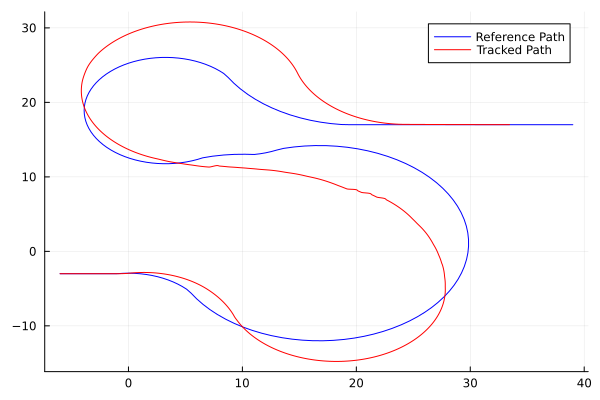

In [103]:
using Plots

# test_combination = [3.0, 5.0, 5.0, -4.0]
# test_combination = [2.0, 6.0, 6.0, -4.0]
# test_combination = [0., 2., 2., 0.]
# test_combination = [1., 100., .01, .01]
# k1, k2, k3, k4 = test_combination

# BEST FROM GRID SEARACH
test_combination = [1., 5., 5., -1.]

test_combination = [5.,3., 2., -1.]

k1 = 10.0^test_combination[1]
k2 = 10.0^test_combination[2]
k3 = 10.0^test_combination[3]
k4 = 10.0^test_combination[4]
# k4 = 0.

function closed_loop_tracking_params!(du, u, p, t)
    closed_loop_tracking!(du, u, p, t, k1, k2, k3, k4)
end

# q0 = @SVector [-1.0, -3.0, 0.0, 0.0, 0.0]
# q0 = @SVector [2.0, 2.0, 0.0, 0.0, 0.0]

odeproblem = ODEProblem(closed_loop_tracking_params!, Vector(q0), (0.0, path_length-0.01), nothing)
odesol = solve(odeproblem, Tsit5(), dt = 0.01)

# Plot the reference and actual trajectories
nominal_at_t = t -> GatekeeperFormationFlight.Dubins3DTrackingController.get_reference_state_and_input(
    path, t, offset
)

plot(τ -> nominal_at_t(τ)[1][1], τ -> nominal_at_t(τ)[1][2], 0.0, path_length-0.01, label = "Reference Path", color = :blue)
# plot(τ -> nominal_at_t(τ)[1][1], τ -> nominal_at_t(τ)[1][2], τ -> nominal_at_t(τ)[1][3], 0.0, path_length-0.01, label = "Reference Path", color = :blue)
plot!(odesol, idxs = (1, 2), label = "Tracked Path", color = :red)

In [71]:
@show best_combination

best_combination = (4.0, 5.0, 5.0, -8.0)


(4.0, 5.0, 5.0, -8.0)